In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [2]:
path = "C:/Users/user/Documents/GitHub/Visual-Analytics/src/static/dataset/"
ctg = pd.read_csv(path+"prod_cat_info.csv") #categories csv
cst = pd.read_csv(path+"Customer.csv")
tr = pd.read_csv(path+"Transactions.csv")
data = pd.read_csv(path+"full_data.csv")

CREATE full_data.csv

In [19]:
ctg.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [20]:
cst.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [21]:
tr.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [22]:
tr['Qty'] = np.abs(tr['Qty'])
tr['total_amt'] = np.abs(tr['total_amt'])
tr.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,5,-772,405.300,4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,5,-1497,785.925,8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,2,-791,166.110,1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,3,-1363,429.345,4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,2,-791,166.110,1748.110,TeleShop


In [23]:
#Merge transaction data with category information
tr_merged = pd.merge(tr, ctg,  how='left', left_on=['prod_cat_code','prod_subcat_code'], 
right_on = ['prod_cat_code','prod_sub_cat_code'])

#Merge with customer information
tr_final = pd.merge(tr_merged, cst,  how='left', left_on=['cust_id'], 
right_on = ['customer_Id'])
tr_final = tr_final.sort_values(by=["tran_date"])

#tr_final.to_csv(path+'full_data.csv', index=False)
tr_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
16050,47933752822,270192,1/1/2012,3,1,4,215,90.300,950.300,e-Shop,Clothing,3,Kids,270192,01-06-1987,F,4.0
16052,35798683065,271913,1/1/2012,1,1,1,229,24.045,253.045,MBR,Clothing,1,Women,271913,15-10-1985,F,2.0
16053,30078154552,269151,1/1/2012,3,2,1,456,47.880,503.880,e-Shop,Footwear,3,Women,269151,29-04-1981,F,2.0
16054,57039573748,268282,1/1/2012,4,1,1,1024,107.520,1131.520,MBR,Clothing,4,Mens,268282,22-12-1970,F,1.0
16055,41901986246,269269,1/1/2012,7,5,2,1122,235.620,2479.620,MBR,Books,7,Fiction,269269,04-02-1981,M,1.0


In [24]:
grouped_tr = tr.groupby(['prod_subcat_code', 'prod_cat_code'])["Qty", "total_amt"].apply(lambda x : x.astype(int).sum())
grouped_tr.head()

Qty  total_amt
prod_subcat_code prod_cat_code                 
1                1              3085    2677312
                 2              2814    2439523
                 4              2976    2623618
2                6              3073    2651658
3                1              2961    2644253

In [25]:
merged_tr = pd.merge(grouped_tr, ctg,  how='outer', left_on=['prod_cat_code','prod_subcat_code'], 
right_on = ['prod_cat_code','prod_sub_cat_code'])
merged_tr = merged_tr.sort_values(by=["prod_cat_code","prod_sub_cat_code"])
merged_tr.head()

,prod_cat_code,Qty,total_amt,prod_cat,prod_sub_cat_code,prod_subcat
0,1,3085,2677312,Clothing,1,Women
4,1,2961,2644253,Clothing,3,Kids
7,1,2916,2574840,Clothing,4,Mens
1,2,2814,2439523,Footwear,1,Mens
5,2,3075,2576409,Footwear,3,Women


Use this in js:

date = //read Python generated data here

var nestedData = d3.nest()
 .key(function(d) { return d.category; })
 .key(function(d) { return d.subcategory; })
 .entries(data);

CREATE pca_kmeans_data.csv

In [26]:
data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,36332303449,268624,2011-01-02,10,6,4,-295,123.900,1303.900,Flagship store,Home and kitchen,10,Kitchen,268624,18-09-1986,F,1.0
1,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,2,Furnishing,268904,25-05-1990,M,5.0
2,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,5,Computers,272756,03-12-1975,F,9.0
3,28972634039,275227,2011-01-02,9,3,1,-334,35.070,369.070,MBR,Electronics,9,Cameras,275227,23-09-1989,M,4.0
4,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,3,Women,267309,08-04-1973,F,1.0


In [34]:
gr_data = data.groupby(['cust_id', 'prod_cat', 'prod_subcat'])["Qty"].apply(lambda x : x.astype(int).sum()).to_frame()
gr_data = gr_data.reset_index()
gr_data['prod_subcat'] = gr_data['prod_cat']+", "+gr_data['prod_subcat'] #concatenate strings
gr_data.head()


,cust_id,prod_cat,prod_subcat,Qty
0,266783,Books,"Books, Non-Fiction",2
1,266783,Clothing,"Clothing, Mens",4
2,266783,Footwear,"Footwear, Mens",8
3,266784,Books,"Books, Fiction",5
4,266784,Books,"Books, Non-Fiction",3


In [35]:
gr_data.columns
#print(gr_data.cust_id.tolist())

Index(['cust_id', 'prod_cat', 'prod_subcat', 'Qty'], dtype='object')

In [36]:
gr_data = gr_data.pivot(index="cust_id", columns="prod_subcat", values="Qty")
gr_data = gr_data.fillna(0)
gr_data.head()
gr_data.reset_index

<bound method DataFrame.reset_index of prod_subcat  Bags, Mens  Bags, Women  Books, Academic  Books, Children  \
cust_id                                                                  
266783              0.0          0.0              0.0              0.0   
266784              0.0          0.0              0.0              0.0   
266785              3.0          0.0              0.0              5.0   
266788              2.0          0.0              0.0              0.0   
266794              2.0          3.0              4.0              3.0   
...                 ...          ...              ...              ...   
275257              0.0          0.0              0.0              3.0   
275261              0.0          2.0              0.0              5.0   
275262              0.0          0.0              0.0              0.0   
275264              0.0          0.0              0.0              0.0   
275265              1.0          0.0              3.0              0.0   

In [37]:
# Get feature names
features = gr_data.columns[1:].tolist()
print(features)

# Get customer ids
customers = gr_data["cust_id"].tolist()
print(customers)

['Bags, Women', 'Books, Academic', 'Books, Children', 'Books, Comics', 'Books, DIY', 'Books, Fiction', 'Books, Non-Fiction', 'Clothing, Kids', 'Clothing, Mens', 'Clothing, Women', 'Electronics, Audio and video', 'Electronics, Cameras', 'Electronics, Computers', 'Electronics, Mobiles', 'Electronics, Personal Appliances', 'Footwear, Kids', 'Footwear, Mens', 'Footwear, Women', 'Home and kitchen, Bath', 'Home and kitchen, Furnishing', 'Home and kitchen, Kitchen', 'Home and kitchen, Tools']


KeyError: 'cust_id'

In [31]:
# Separating out the features
x = gr_data.loc[:, features].values
print(x)

# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  5. ...  0. 10.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  4.]
 [ 0.  3.  0. ...  3.  0.  0.]]
[[-0.34405964 -0.34230802 -0.35592661 ... -0.35402952 -0.3562188
  -0.35973491]
 [-0.34405964 -0.34230802 -0.35592661 ... -0.35402952 -0.3562188
  -0.35973491]
 [-0.34405964 -0.34230802  2.79578117 ... -0.35402952  5.9240908
  -0.35973491]
 ...
 [-0.34405964 -0.34230802 -0.35592661 ... -0.35402952 -0.3562188
  -0.35973491]
 [-0.34405964 -0.34230802 -0.35592661 ... -0.35402952 -0.3562188
   2.13092891]
 [-0.34405964  1.59673308 -0.35592661 ...  1.54895116 -0.3562188
  -0.35973491]]


In [42]:
#Applying PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x) #vector of principal components for each cust_id
print(principalComponents.shape)
print(principalComponents[:,:2].shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 1', 'pc 2'])
#principalDf = pd.concat([gr_data['cust_id'], principalDf], axis = 1)
#principalDf.head()

(5506, 6)
(5506, 2)


In [66]:
#Running K-Means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 2 1 ... 1 2 3]
[[-4.53137621e-03 -4.21806386e-02  2.71694663e+00 -1.00315093e-02
  -3.27062805e-02 -7.33704793e-02 -3.09418020e-02  5.37733242e-02
   5.97563123e-02 -1.55880256e-01 -1.32913687e-02 -7.03851715e-03
   3.53657243e-02  8.09446048e-02 -1.51437898e-01 -4.59114839e-02
   6.03546646e-03 -4.43202496e-02]
 [ 3.74218791e-03  7.73110911e-03 -2.90443780e-01 -6.93157792e-04
  -1.00597505e-03 -5.12122708e-03  1.90016879e-03  4.92752762e-03
  -6.80476567e-03 -3.02170293e-01 -2.92653113e-03  8.98465156e-03
  -5.01310499e-03  3.00264087e-03 -2.93835596e-01  3.83404354e-03
   6.07358063e-03  1.38406174e-02]
 [ 2.74131242e-02  1.73071603e-02 -1.99307674e-01  3.58609044e-02
   1.76091300e-02  6.10601231e-02  3.25628503e-02 -6.16527895e-02
   8.18179672e-03 -1.36061226e-01 -5.12983541e-04 -4.22033155e-02
  -5.53154266e-02 -4.79650603e-02  2.77863865e+00 -6.09198011e-02
  -3.55898737e-02  1.51960137e-02]
 [-5.21642600e-02 -3.59890675e-02 -2.42087895e-01 -1.91210666e-02
   2.42994619e-02  

In [83]:
#Append labels on dataframe and write it to csv file
labels = pd.Series(kmeans.labels_)
#print(labels)
clusteredDf = pd.concat([principalDf, labels], axis = 1)
clusteredDf = clusteredDf.rename(columns={"cust_id": "cust_id", "pc 1": "pc_1", "pc 2": "pc_2", 0: "cluster"})
clusteredDf.head()
clusteredDf.to_csv(path+'pca_kmeans_data.csv', index=False)


CREATE rfm_data.csv

In [3]:
path = "C:/Users/user/Documents/GitHub/Visual-Analytics/src/static/dataset/"
data = pd.read_csv(path+"full_data.csv")

In [4]:
#Convert date string to datetime type
data['tran_date'] = pd.to_datetime(data['tran_date'])
snapshot_date = data['tran_date'].max() + timedelta(days=1)
print(snapshot_date)

2014-12-03 00:00:00


In [5]:
# Grouping by CustomerID
data_process = data.groupby(['cust_id']).agg({
        'tran_date': lambda x: (snapshot_date - x.max()).days, #days since last purchase
        'transaction_id': 'count', #n of transactions
        'total_amt': 'sum'}) #total money spent
data_process.head()

,tran_date,transaction_id,total_amt
cust_id,,,
266783,457,5,14791.530
266784,815,3,5694.065
266785,658,8,35271.600
266788,366,4,6092.970
266794,1,12,28253.745


In [6]:
# Rename the columns 
data_process.rename(columns={'tran_date': 'recency',
                         'transaction_id': 'frequency',
                         'total_amt': 'monetary'}, inplace=True)
data_process.head()

,recency,frequency,monetary
cust_id,,,
266783,457,5,14791.530
266784,815,3,5694.065
266785,658,8,35271.600
266788,366,4,6092.970
266794,1,12,28253.745


In [7]:
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

5,506 rows; 3 columns


C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

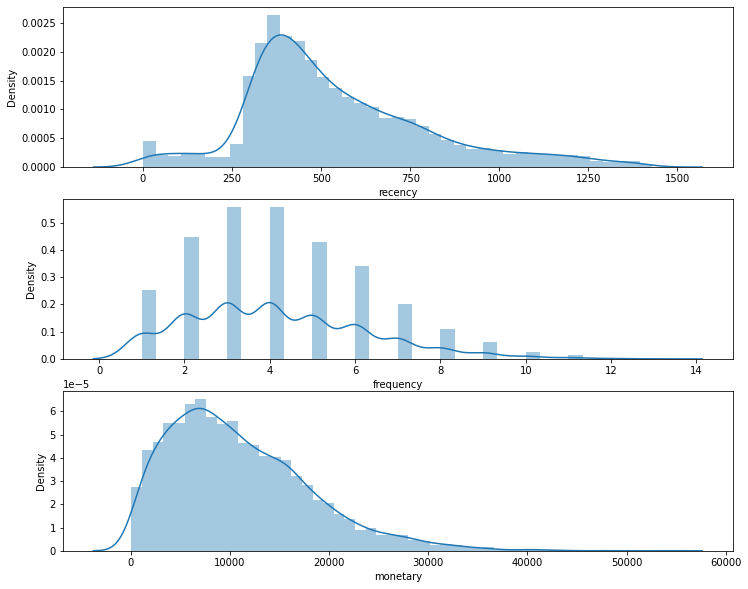

In [8]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['monetary'])
# Show the plot
plt.show()

In [9]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1) #from 4 to 1, decreasing by 1
f_labels = range(1, 5) #from 1 to 4, increasing by 1
m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups (qcut = quantile-based discretization)
r_groups = pd.qcut(data_process['recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['frequency'], q=4, labels=f_labels)
# Assign these labels to 4 equal percentile groups
m_groups = pd.qcut(data_process['monetary'], q=4, labels=m_labels)
# Create new columns R, F, M
data_process = data_process.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
data_process.head()

,recency,frequency,monetary,R,F,M
cust_id,,,,,,
266783,457,5,14791.530,3,3,3
266784,815,3,5694.065,1,1,2
266785,658,8,35271.600,2,4,4
266788,366,4,6092.970,4,2,2
266794,1,12,28253.745,4,4,4


In [10]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_Segment_Concat
cust_id,,,,,,,
266783,457,5,14791.530,3,3,3,333
266784,815,3,5694.065,1,1,2,112
266785,658,8,35271.600,2,4,4,244
266788,366,4,6092.970,4,2,2,422
266794,1,12,28253.745,4,4,4,444


In [11]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

60


In [12]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

cust_id
266783     9.0
266784     4.0
266785    10.0
266788     8.0
266794    12.0
Name: RFM_Score, dtype: float64


In [13]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
cust_id,,,,,,,,,
266783,457,5,14791.530,3,3,3,333,9.0,Can't Loose Them
266784,815,3,5694.065,1,1,2,112,4.0,Needs Attention
266785,658,8,35271.600,2,4,4,244,10.0,Can't Loose Them
266788,366,4,6092.970,4,2,2,422,8.0,Champions
266794,1,12,28253.745,4,4,4,444,12.0,Can't Loose Them


In [18]:
rfm.reset_index(inplace=True)
rfm.head()

,cust_id,recency,frequency,monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,266783,457,5,14791.530,3,3,3,333,9.0,Can't Loose Them
1,266784,815,3,5694.065,1,1,2,112,4.0,Needs Attention
2,266785,658,8,35271.600,2,4,4,244,10.0,Can't Loose Them
3,266788,366,4,6092.970,4,2,2,422,8.0,Champions
4,266794,1,12,28253.745,4,4,4,444,12.0,Can't Loose Them


In [23]:
rfm_segments = rfm.groupby(['R', 'F']).agg({
    'monetary' : 'mean',
    'cust_id' : 'count',
    'RFM_Level' : lambda x: x.value_counts().index[0]
})
rfm_segments.reset_index(inplace=True)
rfm_segments.columns = ['R','F','Avg_M', 'Count', 'RFM_Level']
rfm_segments.head()

,R,F,Avg_M,Count,RFM_Level
0,4,1,6087.913887,337,Potential
1,4,2,10275.023720,250,Can't Loose Them
2,4,3,14558.765000,459,Can't Loose Them
3,4,4,21206.258640,331,Can't Loose Them
4,3,1,6342.094032,434,Promising


In [14]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   recency frequency monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them     377.0       6.3  17908.8  1865
Champions            482.1       4.6  12285.5   591
Loyal                494.4       3.9   9870.6   619
Needs Attention      756.4       2.3   5123.1   584
Potential            502.3       3.1   7397.0   658
Promising            608.3       2.7   6600.0   629
Require Activation   973.9       1.7   2762.4   560


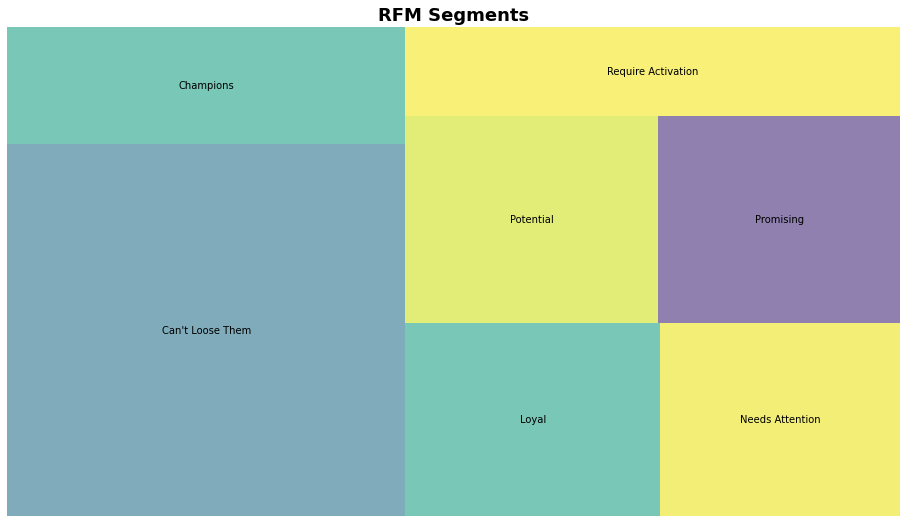

In [15]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [4]:
cst_data = pd.read_csv(path+"Customer.csv")
rfm_data = pd.read_csv(path+"rfm_data.csv")
pca_data = pd.read_csv(path+"pca_kmeans_data.csv")
print(cst_data.shape, rfm_data.shape, pca_data.shape)
print(cst_data.columns)
print(rfm_data.columns)
print(pca_data.columns)

(5647, 4) (5506, 11) (5506, 26)
Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')
Index(['cust_id', 'recency', 'frequency', 'monetary', 'R', 'F', 'M',
       'RFM_Segment_Concat', 'RFM_Score', 'RFM_Level', 'Avg_M'],
      dtype='object')
Index(['cust_id', 'pc_1', 'pc_2', 'cluster', '(Bags) Women',
       '(Books) Academic', '(Books) Children', '(Books) Comics', '(Books) DIY',
       '(Books) Fiction', '(Books) Non-Fiction', '(Clothing) Kids',
       '(Clothing) Mens', '(Clothing) Women', '(Electronics) Audio and video',
       '(Electronics) Cameras', '(Electronics) Computers',
       '(Electronics) Mobiles', '(Electronics) Personal Appliances',
       '(Footwear) Kids', '(Footwear) Mens', '(Footwear) Women',
       '(Home and kitchen) Bath', '(Home and kitchen) Furnishing',
       '(Home and kitchen) Kitchen', '(Home and kitchen) Tools'],
      dtype='object')


In [17]:
#Merge demographic data with cluster info (if some cust id are in cstdata but not in pca they are not taken)
customers = pd.merge(cst_data, pca_data[["cust_id", "cluster"]],  how='right', left_on=['customer_Id'], 
right_on = ['cust_id'])
print(customers.shape)

#Merge last merged with rfm data
customers = pd.merge(customers, rfm_data, how='inner', left_on=['cust_id'], 
right_on = ['cust_id'] )
print(customers.shape)

(5506, 6)
(5506, 16)


In [18]:
customers.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'cust_id', 'cluster',
       'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFM_Segment_Concat',
       'RFM_Score', 'RFM_Level', 'Avg_M'],
      dtype='object')

In [19]:
to_be_removed = ["customer_Id", "RFM_Segment_Concat", "RFM_Score", "RFM_Level"]
customers = customers.drop(columns=to_be_removed)
customers.columns

Index(['DOB', 'Gender', 'city_code', 'cust_id', 'cluster', 'recency',
       'frequency', 'monetary', 'R', 'F', 'M', 'Avg_M'],
      dtype='object')

In [24]:
customers['city_code'] = customers['city_code'].astype('Int64')
customers['monetary'] = customers['monetary'].apply(lambda x: round(x,2))

In [25]:
customers.head()

,DOB,Gender,city_code,cust_id,cluster,recency,frequency,monetary,R,F,M,Avg_M
0,02-01-1970,M,4,268408,2,324,11,26592.93,4,4,4,19173.638545
1,07-01-1970,F,8,269696,0,851,3,10985.91,1,2,3,8349.663482
2,08-01-1970,F,8,268159,3,612,6,17888.84,2,4,4,18373.700099
3,10-01-1970,F,2,270181,3,93,10,25681.31,4,4,4,19173.638545
4,11-01-1970,M,1,268073,2,338,3,9432.28,4,2,2,8625.839161
